In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#  importar base de dados
base_dados = sns.load_dataset('iris')
# ver base de dados
base_dados.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# ver quantidade de linhas e colunas
base_dados.shape

(150, 5)

**Medidas de Tendência Central**

*Média Aritmética*

In [6]:
base_dados['petal_length'].mean()

3.7580000000000005

*Moda*

In [7]:
base_dados['petal_length'].mode()

0    1.4
1    1.5
Name: petal_length, dtype: float64

*Mediana*

In [8]:
base_dados['petal_length'].median()

4.35

**Medidas Separatrizes** 

*valores que ocupam posições no conjunto de dados, em rol, dividindo-o em partes iguais e podem ser:*
* Quartil: Os quartis dividem o conjunto de dados em quatro partes iguais

In [10]:
base_dados['sepal_length'].describe()
#count: valores na base de dados
# mean: média dos valores
# std: desvio padrão
#min: valor mínimo
#25%: primeiro quartil
#50%: segundo quartil - mediana
#70%:terceiro quartil
#máx:

# min        25%      50%        75%       máx
# 4.3 <---> 5.1 <---> 5.8 <---> 6.4 <---> 7.9

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

<Axes: ylabel='sepal_length'>

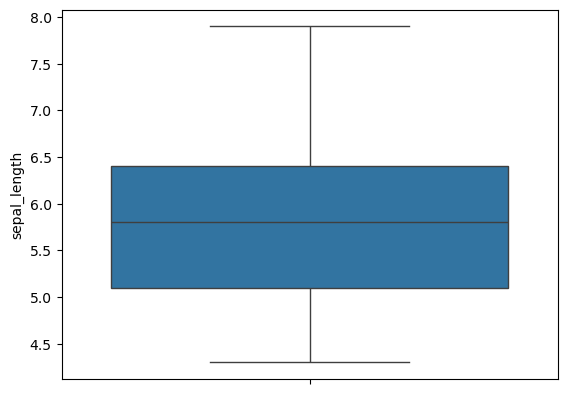

In [11]:
# boxplot
sns.boxplot(base_dados['sepal_length'])

**Medidas de Dispersão**

**Amplitude Total**

*é a diferença entre o maior e o menor valor observado*

In [5]:
# maior valor menos o menor valor
base_dados['sepal_length'].max() - base_dados['sepal_length'].min()

3.6000000000000005

**Amplitude interquartílica** <p>
é a diferença entre o terceiro e o primeiro quartil. É mais estável que a amplitude total por não considerar os valores mais extremos

In [12]:
base_dados['sepal_length'].describe()[6:7].values - base_dados['sepal_length'].describe()[4:5].values

array([1.3])

**Amplitude Semi-interquartílica** <p>
é definida como a média aritmética da diferença entre a mediana e os quartis

In [14]:
(base_dados['sepal_length'].describe()[6:7].values - base_dados['sepal_length'].describe()[4:5].values) / 2

array([0.65])

**Variância** <p>
mostra o quão distante os valores estão das médias

In [15]:
base_dados['sepal_length'].var()

0.6856935123042505

** Desvio Padrão** <p>
é o resultado positivo da raiz quadrada da variância

In [17]:
base_dados['sepal_length'].std()

0.8280661279778629

**Medidas de Assimetria** <p>
é um indicador da forma da distribuição dos dados. Ao construir uma distribuição de frequências eqou um histograma, esta-se buscando, também, identificar visualmente, a forma da distribuição dos dados.

* **Simétrica** se média = mediana = moda ou As =0
* **Assimétrica** negativa se média  ≤ mediana  ≤ moda As  < 0
* **Assimétrica** positiva se moda  ≤  mediana  ≤ média ou As > 0 

In [19]:
# calcular a assimetria
base_dados['sepal_length'].skew()
# o resultado é uma assimatria positiva

0.3149109566369728

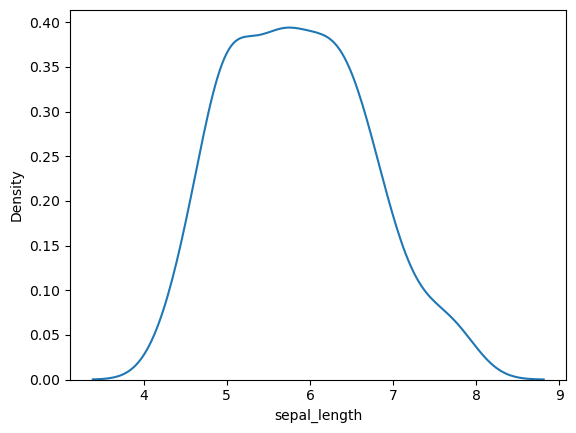

In [20]:
# ver curva de assimetria
sns.kdeplot( base_dados['sepal_length']); 

**Medidas de Curtose** <p>
é o grau de achatamento da distribuição, indicador da forma da distribuição

* Leptocúrtica (mais longa): quando a distribuição apresenta uma curva de frequência bastante fechada, com concentração de dados
em torno de seu centro, K<0,263. <p>
* Mesocúrtica(curva do meio): quando os dados estão razoavelmente concentrados em torno de seu centro, K= 0,263. <p>
* Platicúrtica(curva inferior): quando a distribuição apresenta uma curva de frequência mais aberta, com os dados fracamente concentrados
em torno de seu centro, K>0,263.

In [22]:
base_dados['sepal_length'].kurtosis()

-0.5520640413156395

**CORRELAÇÃO**<p>
*O que é correlação?*

Correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

Varia entre –1 e +1.

* +1 → relação positiva perfeita

* –1 → relação negativa perfeita

* 0 → sem relação linear

**Como fazer a análise de correlação?**

* Coletar os dados das variáveis que deseja comparar.

* Verificar consistência e outliers, pois valores extremos podem distorcer a correlação.

* Calcular a matriz de correlação (por exemplo, usando pandas: df.corr() ou métodos estatísticos).

* Interpretar valores observando:

- direção (positivo/negativo)

- força (fraco, moderado, forte)

**Visualizar usando heatmaps, scatterplots etc.**

*Correlação de Pearson*

* Também chamada de coeficiente de correlação linear.

* Mede apenas relações lineares entre duas variáveis numéricas.

* Fórmula considera covariância dividida pelos desvios-padrão das variáveis.

**Supõe:**

* relação linear

* variáveis contínuas

* distribuição aproximadamente normal

In [29]:
# remover a coluna  com texto, e a corr só funciona com dados numéricos
df_numerico = base_dados.drop(columns=['species'])
#-------------------------------------------------
#ver correlação entre as variáveis
df_numerico.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

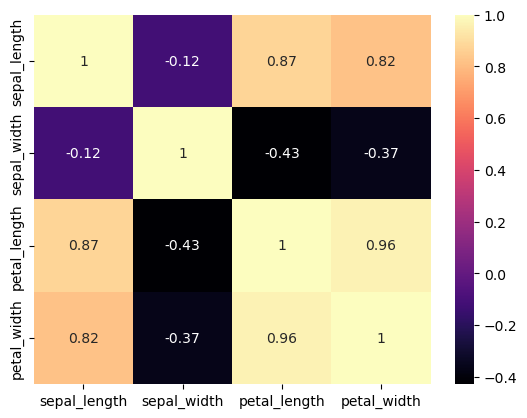

In [37]:
# Criar uma base de dados sem a coluna de texto
base_dados_2 = base_dados.drop(columns=['species'])
#--------------------------------------------------

# usar a base de dados para criar o grafico de calor da correlação
sns.heatmap(base_dados_2.corr(), annot=True, cmap='magma')

# CMAP: mapa de cores


<Axes: xlabel='petal_length', ylabel='petal_width'>

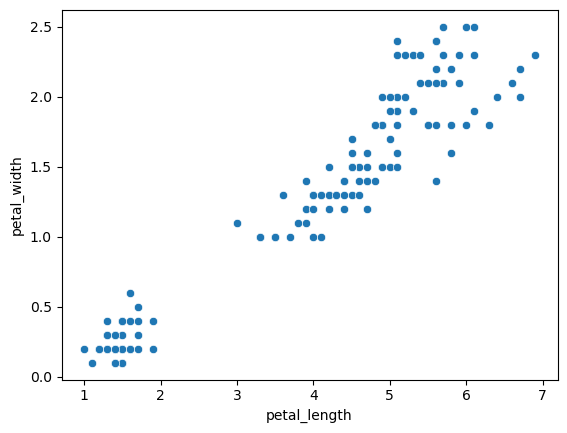

In [39]:
# CORRELAÇÃO DE PEARSON
# ver relação linear das variáveis
sns.scatterplot( data=base_dados, x= 'petal_length', y='petal_width')

**Correlação de Spearman**<p>
uma vez que a correlação de Spearman segue uma lógica monotética, e não tem pressupostos lineares como na correlação de Pearson, é possível utilizar o rs para relações não lineares

In [41]:
base_dados_2.corr('spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


<Axes: >

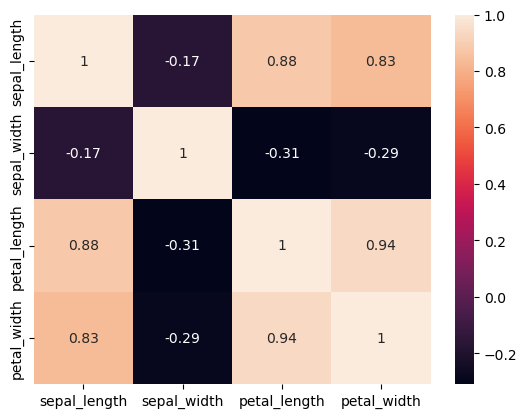

In [44]:
sns.heatmap(base_dados_2.corr('spearman'), annot =True)

<Axes: xlabel='sepal_length', ylabel='petal_width'>

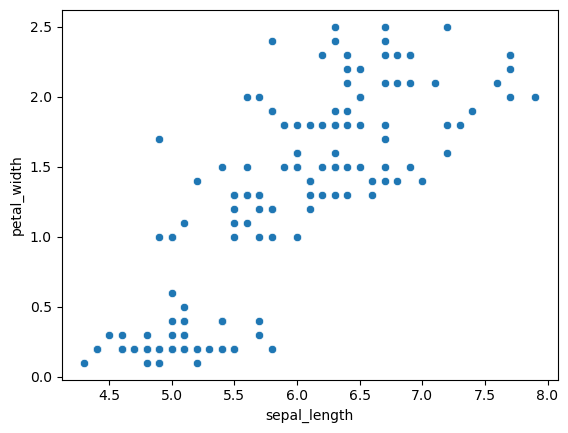

In [46]:
sns.scatterplot(data=base_dados, x='sepal_length', y= 'petal_width')

## NumPy
fornece um grande conjunto de funções e operações de bibliotecas que ajudam os programadores a executar facilmente cálculos numéricos.

In [13]:
# importar a lib
import numpy as np

In [14]:
# Verificar a versão
print(np.__version__)

1.26.4


In [15]:
# criar matriz / array
array = np.array( [10, 20, 30, 40, 50])
array

array([10, 20, 30, 40, 50])

In [7]:
# tipo
type(array)

numpy.ndarray

In [17]:
duas = np.array(
    [[10, 9, 8, 7, 6],
     [5, 4, 3, 2, 1]]
) 
print(duas)

[[10  9  8  7  6]
 [ 5  4  3  2  1]]


In [18]:
tres= np.array([[15,14,13,12,11], [10,9,8,7,6],[5,4,3,2,1]]
              )
print(tres)

[[15 14 13 12 11]
 [10  9  8  7  6]
 [ 5  4  3  2  1]]


In [21]:
# Experimento de processamento
estresando_np = np.arange(1000000)
len(estresando_np)

1000000

In [22]:
# 1° Teste
%time for loop in estresando_np: pass

CPU times: total: 141 ms
Wall time: 379 ms


In [23]:
# acessar os arrays
# 1ª posição
array[0]

10

In [24]:
# acessar os arrays
# ultima posição
array[-1]

50

In [25]:
# range
array[2:]

array([30, 40, 50])

In [26]:
# operações SOMAR
array[0] + array[1]

30

In [27]:
# operações SUBTRAIR
array[0] - array[1]

-10

In [28]:
# operações MULTIPLICAR
array[0] * array[1]

200

In [29]:
# operações DIVIDIR
array[0] / array[1]

0.5

*Operações Lógicas*

In [30]:
array[0] == array[1]

False

In [31]:
# operações
array[0] >= array[1]

False

In [32]:
# verificar dimensão
array.shape

(5,)

In [33]:
#dimensões da array duas
duas.shape

(2, 5)

In [34]:
#dimensões da array tres
tres.shape

(3, 5)

In [35]:
# loop
for loop in array:
    print(loop)

10
20
30
40
50


In [37]:
for loop in duas:
    for interno in loop:
      print(interno)

10
9
8
7
6
5
4
3
2
1


In [38]:
# converter array para pandas
import pandas as pd

In [42]:
pd.DataFrame(array, columns=['Vetor 1 Dimensão'])

,Vetor 1 Dimensão
0,10
1,20
2,30
3,40
4,50


# *WORD CLOUDS*

Word clouds (ou “nuvens de palavras”) são representações visuais de textos em que as palavras aparecem com tamanhos proporcionais à sua frequência ou relevância. Quanto mais uma palavra aparece no texto analisado, maior ela fica na imagem.
Para que é usado:


* Identificar rapidamente os termos mais importantes em um conjunto de dados textuais.
* Explorar tendências em discursos, comentários, avaliações, pesquisas, posts de redes sociais etc.
* Apoiar análises exploratórias em pesquisas acadêmicas, marketing e ciência de dados.

*Exemplo: Ao analisar comentários de clientes de uma loja, uma word cloud pode destacar palavras como “atendimento”, “preço” e “entrega”. Se “atendimento” aparecer bem grande, isso indica que os clientes mencionam esse tema com muita frequência.*

In [1]:
!pip install WordCloud

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------  297.0/299.9 kB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 4.6 MB/s eta 0:00:00


In [2]:
# pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Exemplo
comentarios_clientes = [
    "Ótimo atendimento, funcionário muito atencioso!",
    "O preço dos celulares está um pouco alto.",
    "A entrega foi rápida e o produto chegou bem embalado.",
    "Gostei da variedade de modelos disponíveis na loja.",
    "Tive problema com a bateria do celular, mas a troca foi rápida.",
    "Muito satisfeita com a qualidade do aparelho.",
    "O suporte técnico demorou para responder.",
    "Promoções muito boas, valeu a pena a compra.",
    "A loja é organizada e fácil de encontrar o que preciso.",
    "O vendedor explicou tudo com muita paciência."
]

In [5]:
# juntar comentarios em uma unica string
texto_comentarios = " ".join(comentarios_clientes)


In [12]:
# Gerar nuvem de palavras
nuvem_palavras = WordCloud(
    background_color='black',
    width=1000,
    height=1000
).generate(texto_comentarios)

In [10]:
nuvem_palavras

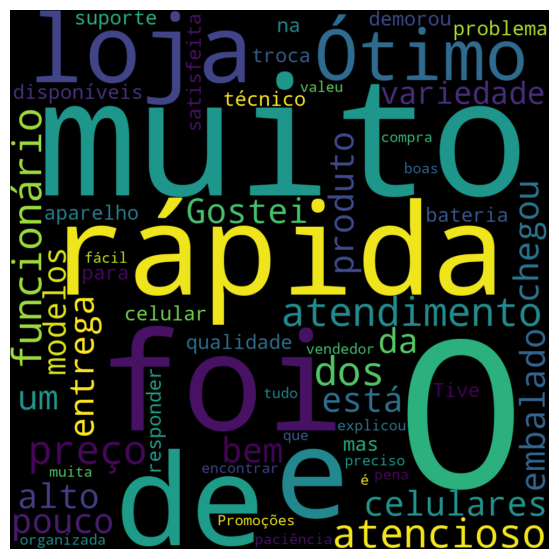

In [13]:
# criar um gráfico
fig, ax = plt.subplots(figsize=(10,7))

ax.imshow(nuvem_palavras, interpolation='bilinear')

ax.set_axis_off() # se eu tirar esse parâmetro, ele mostra os eixos do grafico

# MAPA DE CALOR

Um mapa de calor de temperatura é uma representação visual que utiliza cores para mostrar como a temperatura se distribui em um ambiente, como salas, escritórios, galpões, cozinhas industriais ou áreas externas. As cores variam normalmente entre tons frios (azul) para regiões mais frias e tons quentes (vermelho) para regiões mais quentes.

**Como ele pode ser usado**

* Identificar variações térmicas dentro de um ambiente.
* Detectar áreas com superaquecimento ou regiões com ventilação insuficiente.
* Ajudar no planejamento de climatização, posicionamento de ar-condicionado ou aquecedores.
* Monitorar conforto térmico em locais com grande fluxo de pessoas.
* Acompanhar eficiência energética, detectando locais onde há perda de calor ou entrada excessiva de calor.

*Exemplo
Em um escritório climatizado, um mapa de calor pode mostrar que a região próxima às janelas fica mais quente à tarde (tons de vermelho), enquanto a área perto do ar-condicionado permanece fria (tons de azul). Isso ajuda a ajustar a distribuição do ar para melhorar o conforto dos funcionários.*

In [14]:
# Bibliotecas
import pandas as pd
import plotly.express as px

In [27]:
# criar dados

# cidades
cidade = [ 'Fortaleza', 'Juazeiro do Norte', 'Sobral', 'Crato', 'Maracanaú',
          'Iguatu', 'Quixadá','Itapipoca', 'Caucaia', 'Aracati']

estado = ['Ceará', 'Ceará', 'Ceará', 'Ceará', 'Ceará', 'Ceará', 'Ceará', 'Ceará', 'Ceará',
          'Ceará']

latitude = [-3.71694, -7.21278, -3.68953, -7.03389, -3.84222,
    -6.36306, -4.96778, -3.49611, -3.73500, -4.55694]

longitude = [-38.54278, -39.315, -40.34854, -39.40889, -38.59028,
    -39.31139, -39.01611, -39.61639, -38.65361, -37.76778]

# valor
vendas= [400, 384, 382, 484, 173, 364, 564, 273, 273, 83]



In [28]:
#Dicionário
dicionario= {
    'Cidade': cidade,
    'UF': estado,
    'Lat': latitude,
    'Log': longitude,
    'Vendas': vendas
}
base_dados= pd.DataFrame(dicionario)
base_dados


,Cidade,UF,Lat,Log,Vendas
0,Fortaleza,Ceará,-3.71694,-38.54278,400
1,Juazeiro do Norte,Ceará,-7.21278,-39.31500,384
2,Sobral,Ceará,-3.68953,-40.34854,382
3,Crato,Ceará,-7.03389,-39.40889,484
4,Maracanaú,Ceará,-3.84222,-38.59028,173
5,Iguatu,Ceará,-6.36306,-39.31139,364
6,Quixadá,Ceará,-4.96778,-39.01611,564
7,Itapipoca,Ceará,-3.49611,-39.61639,273
8,Caucaia,Ceará,-3.73500,-38.65361,273
9,Aracati,Ceará,-4.55694,-37.76778,83


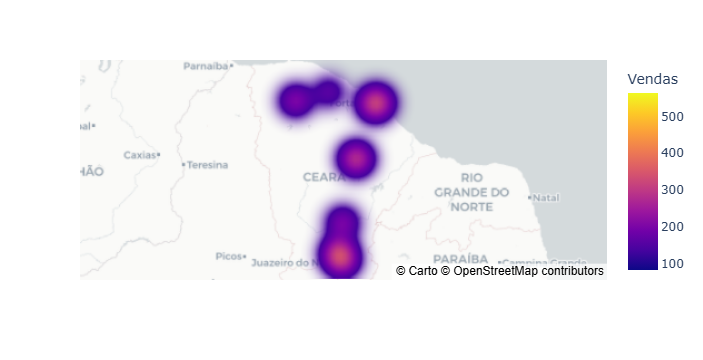

In [48]:
# Mapa de calor geográfico
px.density_mapbox(
    base_dados,
    lat='Lat',
    lon='Log',
    z='Vendas',
    radius=35,
    center=dict(lat=-5.2, lon=-39.3),
    zoom=5,
    mapbox_style='carto-positron'
)